In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
data = pd.read_csv('vaccination_tweets.csv')
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [3]:
data.shape

(8082, 16)

In [4]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [5]:
data = data.dropna()
data.head(5)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False
10,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,"while deaths are closing in on the 300,000 mar...","['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False


In [6]:
data.shape

(4749, 16)

In [7]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,4.749000e+03,4.749000e+03,4749.000000,4749.000000,4749.000000,4749.000000
mean,1.355333e+18,5.069683e+04,1341.396926,14523.124447,1.545378,9.385555
std,1.280104e+16,3.545440e+05,3453.847283,36379.651961,13.395572,55.280915
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.344929e+18,1.740000e+02,215.000000,497.000000,0.000000,0.000000
50%,1.352030e+18,6.480000e+02,549.000000,2713.000000,0.000000,1.000000
75%,1.364940e+18,2.728000e+03,1419.000000,12258.000000,1.000000,5.000000
max,1.384788e+18,1.371493e+07,103226.000000,854011.000000,678.000000,1979.000000


In [8]:
from nltk.corpus import stopwords
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

In [10]:
import string
def cleaned_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w','',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = "".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = "".join(text)
    return text
data["text"] = data["text"].apply(cleaned_text)

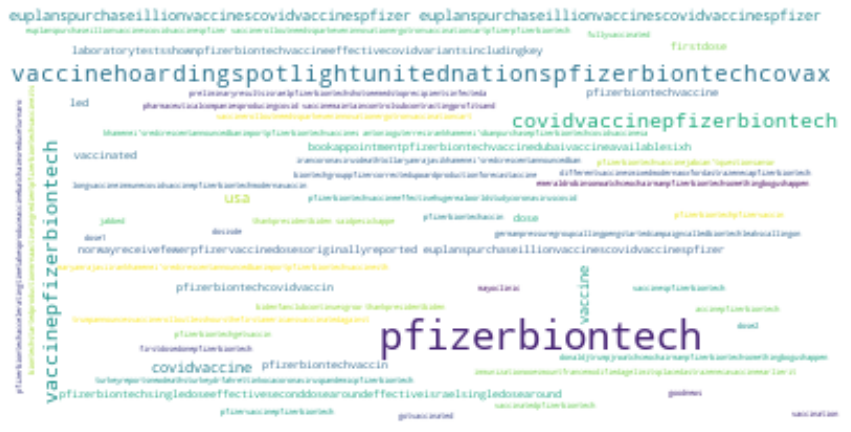

In [18]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

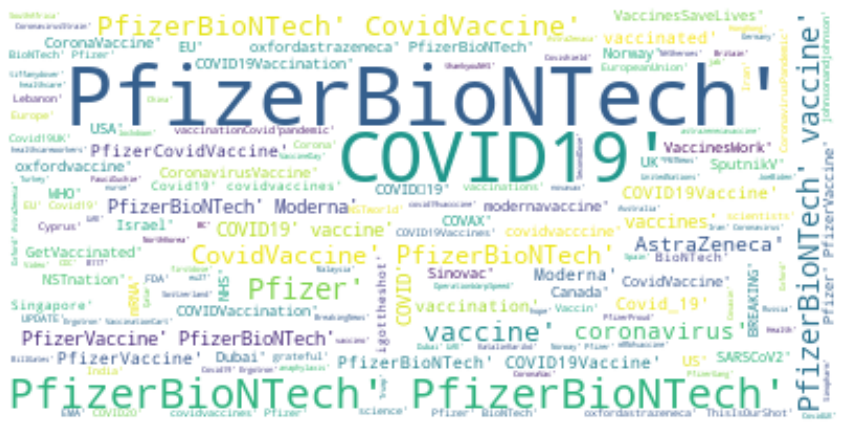

In [17]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Balaji\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [16]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  0.0
Negative:  0.0
Neutral:  4749.0
